## Fundamentals of Deep Learning

In this lecture, we will explore the foundational concepts of deep learning through the lens of a simple linear regression problem. You'll gain hands-on experience with **gradient descent**, learning how to:

- Initialize model parameters  
- Perform a forward pass to make predictions  
- Compute prediction errors and loss  
- Calculate gradients through backpropagation  
- Update parameters to minimize the loss  

We'll also **differentiate between batch, mini-batch, and stochastic gradient descent**, examining their impact on model performance and convergence. Additionally, you'll **visualize how varying the learning rate affects the training process**, and develop an intuitive understanding of why **feature standardization and scaling** are crucial for effective learning.

By the end of the lecture, you'll have a solid grasp of how a deep learning model learns from data step by step. Here are the fundamental definitions:  

### What is a Loss Function ?!  
The **loss function** measures how well our model's predictions match the true labels. It guides the learning process by quantifying the error.

$$
\mathcal{L}(\theta) = \mathcal{L}(\hat{y}(\theta), y)
$$

Where:  
- $\theta$: model parameters  
- $\hat{y}(\theta)$: model predictions  
- $y$: true labels 

---

### What is meant by Optimization ?!  
**Optimization** refers to the process of finding the best parameters \( \theta \) that minimize the loss function.

$$
\hat{\theta} = \arg\min_\theta \, \mathcal{L}(\hat{y}(\theta), y) = \frac{1}{n} \sum_{i=1}^{n} \mathcal{L}(\hat{y}(x_i; \theta_i), y_i)
$$

Where:  
- $\hat{\theta}$: optimal parameters  
- $n$: number of data points  
- $x_i$: input data  
- $y_i$: corresponding label  
- $\mathcal{L}(\hat{y}(x_i; \theta_i), y_i)$: loss for each sample  

---

### What about Hyperparameters ?!  
**Hyperparameters** are external configurations that control the training process. These include model weights and bias.

$$
\theta = \{ \mathbf{w}, b \} \quad \text{where } \mathbf{w} = (w_1, w_2, \dots, w_n)
$$

- $\mathbf{w}$: weight vector  
- $b$: bias term 

## 1. Data Generation

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

The model is simply:  
$y = wx + b + \epsilon$

In [618]:
# Generate synthetic data
n_samples = 100
true_b = 1
true_w = 2


np.random.seed(42)
X = np.random.rand(n_samples, 1)
epsilon = (.1 * np.random.randn(n_samples, 1))
y = true_b + true_w * X + epsilon

# The same can be achieved using scikit-learn package
#X, y = make_regression(n_samples=n_samples, n_features=1, noise=1)

Text(0, 0.5, 'y')

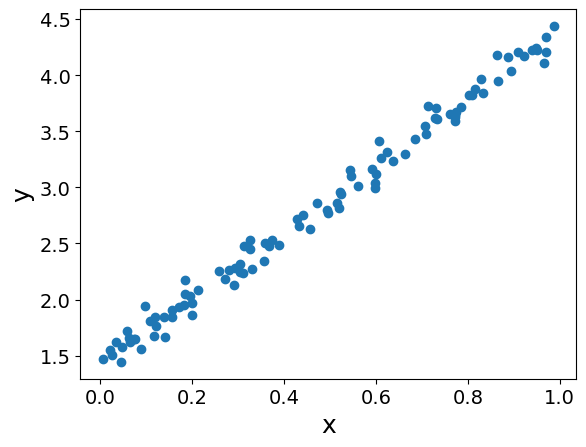

In [ ]:
_ = plt.Figure(figsize=(10,8))
plt.scatter(x=X, y=y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

## 2. Train-Test Split

In [439]:
# Shuffles the indices
idx = np.arange(n_samples)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(n_samples*.8)]
# Uses the remaining indices for validation
test_idx = idx[int(n_samples*.8):]

# Split data to train and validation sets
X_train, y_train = X[train_idx], y[train_idx].squeeze()
X_test, y_test = X[test_idx], y[test_idx].squeeze()

# TODO: Can you think of more simpler way to do the splitting ?

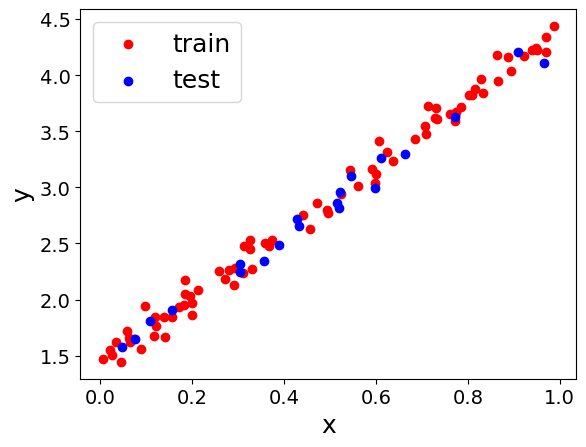

In [440]:
# visulize the train and test sets
_ = plt.Figure(figsize=(10,8))
plt.scatter(X_train, y_train, c='red', label='train')
plt.scatter(X_test, y_test, c='blue', label='test')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(fontsize=18)

## 3. Model Parameters Initialization

In [ ]:
# Initializes model parameters "b" and "w" randomly
# Want help: help(np.random.rand)
np.random.seed(42)
b = np.random.rand(1)
w = np.random.rand(1)
print(b, w)

[0.37454012] [0.95071431]


## 4. The Forward Pass

In [442]:
# Calculate the model predictions y^hat
yhat = w * X_train + b

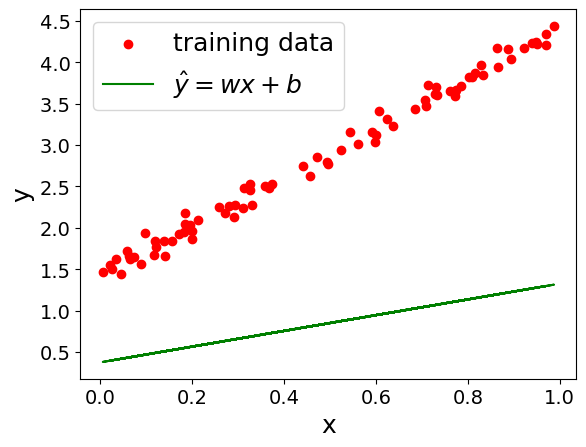

In [443]:
# Visualize the model
_ = plt.Figure(figsize=(10,8))
plt.scatter(X_train, y_train, c='red', label='training data')
plt.plot(X_train, yhat, c='green', label=r'$\hat{y} = wx + b$')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(fontsize=18)

## 5. Caculate the Loss  
The loss function (or cost function) is a function that measures the difference between the model’s prediction and the true value (ground truth). It tells you how **well** or **poorly** your model is performing on a given input. In **regression problems**, a commonly used loss function is the **Mean Squared Error (MSE)**.  

Then, the **Mean Squared Error** over a dataset of $n$ samples is defined as:

$$
\mathcal{L}_{\text{MSE}}(w, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - f(x_i; w, b) \right)^2 = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (w x_i + b) \right)^2
$$

In [444]:
# It is a regression, so the loss can be a mean squared error (MSE)
loss = ((yhat - y_train) ** 2).mean()
# This value corresponds to a particular choice of the model parameters (w and b)
print(loss)

4.92956499427449


## What is a Loss Surface?  
The **loss surface** is a **visual representation** of how the loss function **changes** with respect to the model’s parameters. In this case, the **weight $w$** and **bias $b$**.  
The **minimum point** (**Global Minumum**) on this surface is where your model performs best — the **optimal parameters**!.  
In low dimensional problems (e.g., linear regression), you can actually plot the entire surface to visualize what's going on.  
  
To plot the loss surface we will create a **grid** of all **combinations** of weights $w$ and biases $b$ in a certain range. Hopefully, in this range we can find the **optimal set of parameters**.

In [458]:
# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 5, true_b + 5, 100)
w_range = np.linspace(true_w - 5, true_w + 5, 100)
# This creates a fine 2D grid in the parameter space
bs, ws = np.meshgrid(b_range, w_range)

In [459]:
print(bs.shape, ws.shape)

(100, 100) (100, 100)


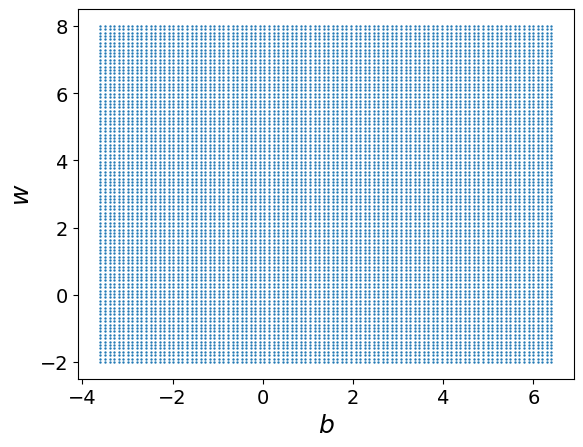

In [460]:
# Visual the grid
_ = plt.Figure(figsize=(12,10))
plt.scatter(bs, ws, s=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$b$', fontsize=18)
plt.ylabel(r'$w$', fontsize=18)
plt.show()

In [461]:
# This is a list comprehension that loops through all training features (x), which are scalars (values)
grid_predictions = np.array([bs + ws * x for x in X_train.squeeze()])
print(grid_predictions.shape)

(80, 100, 100)


In [462]:
# Now calculate the loss again but for all the predictions
# What is np.newaxis
errors = (grid_predictions - y_train[:, np.newaxis, np.newaxis]) ** 2
grid_losses = errors.mean(axis=0)  # average over samples

## Visualize the Loss Surface

Minimum at w = 2.949, b = 1.451, loss = 0.00840


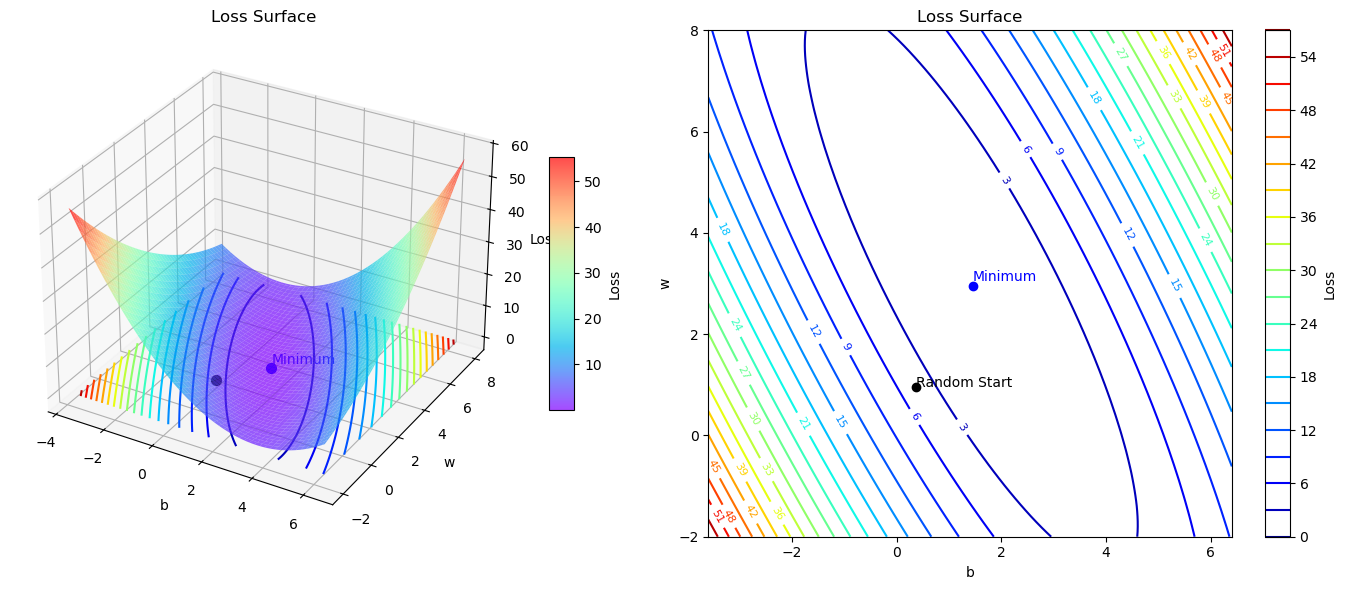

In [463]:
# Step 1: Get the index of the minimum loss
min_idx = np.unravel_index(np.argmin(grid_losses), grid_losses.shape)

# Step 2: Extract the corresponding w and b
b_min = bs[min_idx]
w_min = ws[min_idx]
print(f"Minimum at w = {w_min:.3f}, b = {b_min:.3f}, loss = {grid_losses[min_idx]:.5f}")

# Setup figure with two subplots: 3D and contour
fig = plt.figure(figsize=(14, 6))

# -------------------------------- #
# 3D LOSS SURFACE WITH COLORBAR #
# -------------------------------- #
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Plot the surface and store the plot object
surf = ax1.plot_surface(bs, ws, grid_losses, cmap='rainbow', alpha=0.7)
cont = ax1.contour(bs, ws, grid_losses, 20, cmap='jet', offset=0)

# Annotations
ax1.scatter(b_min, w_min, 0, color='blue', s=50)  # Example "Minimum"
ax1.text(b_min, w_min+0.1, 1, "Minimum", color='blue')
ax1.scatter(b, w, 2, color='black', s=50)  # Example "Random Start"

ax1.set_xlabel("b")
ax1.set_ylabel("w")
ax1.set_zlabel("Loss")
ax1.set_title("Loss Surface")

# Add colorbar for surface
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, label="Loss")

# ---------------------------------------- #
#          CONTOUR PROJECTION              #
# ---------------------------------------- #
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(bs, ws, grid_losses, levels=20, cmap='jet')
ax2.clabel(contour, inline=True, fontsize=8)

# Add colorbar for contours
contour_cb = fig.colorbar(contour, ax=ax2, label="Loss")

# Points
ax2.scatter(b_min, w_min, color='blue')
ax2.text(b_min, w_min+0.1, "Minimum", color='blue')
ax2.scatter(b, w, color='black')
ax2.text(b, w, "Random Start", color='black')

ax2.set_xlabel("b")
ax2.set_ylabel("w")
ax2.set_title("Loss Surface")

plt.tight_layout()
plt.show()

#### Let's plot a **cross-section** in the loss surface to check what the loss would look like if one of the parameter a held constant:

29 39


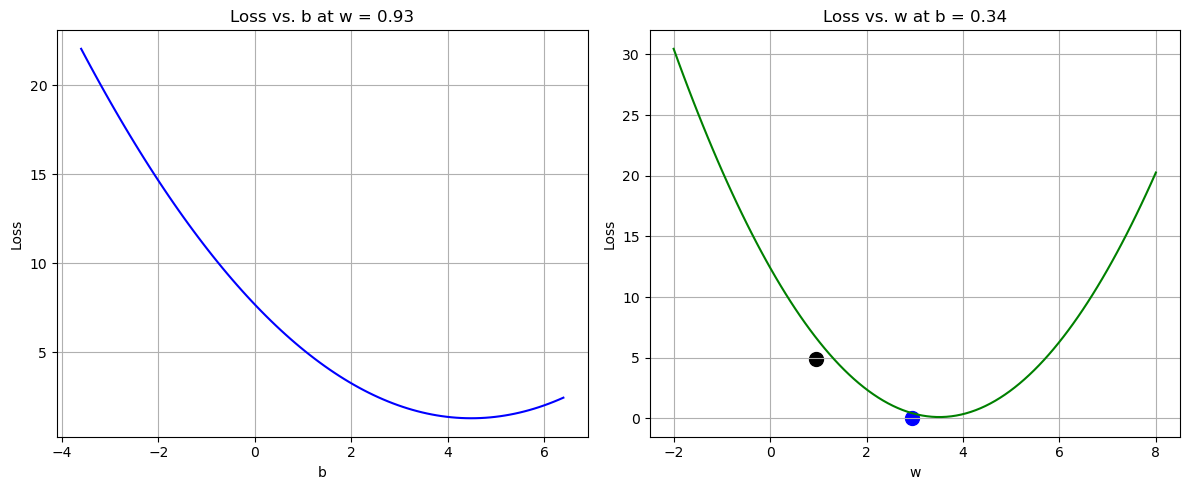

In [468]:
%matplotlib inline
# Fix values to slice at
w_fixed = w
b_fixed = b

# Find closest indices in w_range and b_range
i_w = np.abs(w_range - w_fixed).argmin()
j_b = np.abs(b_range - b_fixed).argmin()
print(i_w, j_b)

# Start figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ---- Plot 1: Loss vs. b at fixed w ----
axs[0].plot(b_range, grid_losses[:, i_w], color='blue')
#axs[0].scatter(b, loss, color='black', s=100)
#axs[0].scatter(b_min, grid_losses[min_idx], color='blue', s=100)
axs[0].set_title(f'Loss vs. b at w = {w_range[i_w]:.2f}')
axs[0].set_xlabel('b')
axs[0].set_ylabel('Loss')
axs[0].grid(True)


# ---- Plot 2: Loss vs. w at fixed b ----
axs[1].plot(w_range, grid_losses[j_b, :], color='green')
axs[1].scatter(w, loss, color='black', s=100)
axs[1].scatter(w_min, grid_losses[min_idx], color='blue', s=100)
axs[1].set_title(f'Loss vs. w at b = {b_range[j_b]:.2f}')
axs[1].set_xlabel('w')
axs[1].set_ylabel('Loss')
axs[1].grid(True)

plt.tight_layout()

#### Which of the two curves yields the largest changes in loss when we modify the changing parameter?

## 6. Compute the Gradients

We start from the Mean Squared Error (MSE) loss function for a linear model:

$$
\mathcal{L}_{\text{MSE}}(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^n \left(y_i - (w x_i + b)\right)^2
$$

#### 1. Gradient with Respect to $b$

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^n \frac{d}{db} (y_i - \hat{y}_i)^2
= \frac{1}{n} \sum_{i=1}^n 2 (y_i - \hat{y}_i)(-1)
= \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
$$

#### 2. Gradient with Respect to $w$

$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{n} \sum_{i=1}^n \frac{d}{dw} (y_i - \hat{y}_i)^2
= \frac{1}{n} \sum_{i=1}^n 2 (y_i - \hat{y}_i)(-x_i)
= \frac{2}{n} \sum_{i=1}^n x_i (\hat{y}_i - y_i)
$$

### Final Form of the Gradients

$
\frac{\partial \mathcal{L}}{\partial b} = \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
\qquad
\frac{\partial \mathcal{L}}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i (\hat{y}_i - y_i)
$


In [417]:
# Computes gradients for both "b" and "w" parameters
dLdb = 2 * (yhat - y_train).mean()
dLdw = 2 * (X_train * (yhat - y_train)).mean()
print(dLdb, dLdw)

-2.2601640738070934 -0.8895307170762802


**Since the gradient for $b$ is larger than the gradient for $w$, the $b$ black curve ($b$ changes, $w$ is constant) yields the largest change in loss.**

## 7. Backpropagation Algorithm

### Backpropagation and Parameter Update

Backpropagation is the process of **computing the gradient of the loss function** with respect to each model parameter (like weights and biases), using the **chain rule**. It is the backbone of training neural networks.

Although the term "backpropagation" originally refers only to how we **calculate** gradients efficiently by working **backwards through the layers**, it is often used more broadly to describe the entire training loop, including the **parameter update step**.

---

### Backpropagation Intuition (Single Neuron Case)

In a single-layer model (like linear regression or a single neuron), there's **no deep network to traverse**, so we only need the derivatives of the loss with respect to $w$ and $b$.

We already computed the gradients for MSE loss:

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
\qquad
\frac{\partial \mathcal{L}}{\partial w} = \frac{2}{n} \sum_{i=1}^{n} x_i (\hat{y}_i - y_i)
$$

---

### Update the Parameters

Once we've computed the gradients, we **update** the parameters \( w \) and \( b \) to minimize the loss. We do this using **gradient descent**, by **moving in the opposite direction of the gradient**.

Let $\eta$ represent the **learning rate**, a small positive number that controls how big the step is.

$$
b = b - \eta \frac{\partial \mathcal{L}}{\partial b}
\qquad
w = w - \eta \frac{\partial \mathcal{L}}{\partial w}
$$

This step nudges the parameters $w$ and $b$ a little bit **toward reducing the loss**, using the gradient as a guide.

---

### Summary of the Update Loop:

1. **Forward pass**: Compute predictions \( \hat{y}_i = w x_i + b \)
2. **Loss**: Compute the MSE loss over the data
3. **Backpropagation**: Compute gradients \( \frac{\partial \mathcal{L}}{\partial w} \) and \( \frac{\partial \mathcal{L}}{\partial b} \)
4. **Update**: Use the gradients to adjust the weights:

   $$
   \theta = \theta - \eta \cdot \nabla \mathcal{L}
   $$

   where \( \theta \in \{w, b\} \)

---

### 📌 Note:
In **deep neural netwoorks**, backpropagation applies the **chain rule** through **multiple layers**, computing partial derivatives at each stage.

In [421]:
# Define learning rate
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the learning rate
updated_b = b - lr * dLdb
updated_w = w - lr * dLdw
print(updated_b, updated_w)

[0.37454012] [0.95071431]
[0.60055653] [1.03966738]


The **learning rate**, often denoted by the Greek letter \( \eta \), is one of the most critical hyperparameters in machine learning. It controls **how big each step** is when we update the model parameters during training using gradient descent.

Imagine you're hiking down a mountain and want to reach the lowest point (the minimum of the loss function). Each step you take represents an **update to your parameters**, and the **steepness** of the slope is the **gradient**.

You can either:
- Take **small careful steps** (low learning rate)
- Take **giant leaps** (high learning rate)

But be careful:
- If your steps are **too small**, it will take forever to get down.
- If your steps are **too big**, you might overshoot or bounce around and never settle.

---

### What Happens at Different Learning Rates?

#### 1. Low Learning Rate
- Takes small steps
- Converges slowly but safely
- Risk: Too slow on large datasets or tight deadlines

#### 2. Medium Learning Rate
- May balance convergence speed and stability
- Often used after experimentation or with learning rate schedules

#### 3. High Learning Rate
- Can overshoot the minimum
- May oscillate or even increase the loss
- Risk: Never converging (ping-pong effect)

#### 4. Very High Learning Rate
- May "jump over" the valley of the loss curve entirely
- Can increase the loss over time instead of decreasing it
- This is like sprinting down a mountain and flying off the other side  

**The size of the learning rate is limited by the steepest curve**

## 8. Scaling / Standardizing / Normalizing

#### **What happens if we multiply the feature $x$ by 10, so it is in the range [0, 10] instead if [0, 1]**

In [541]:
# Data Generation
np.random.seed(42)

true_b = 1.4
true_w = 3

# We divide w by 10 to avoid scaling the target
scaled_w = true_w / 10
# And multiply x by 10
X_scaled = X * 10
# So, the net effect on y is zero - it is still
# the same as before
y_scaled = true_b + scaled_w * X_scaled + (.1 * np.random.randn(n_samples, 1))

Text(0, 0.5, 'y (scaled)')

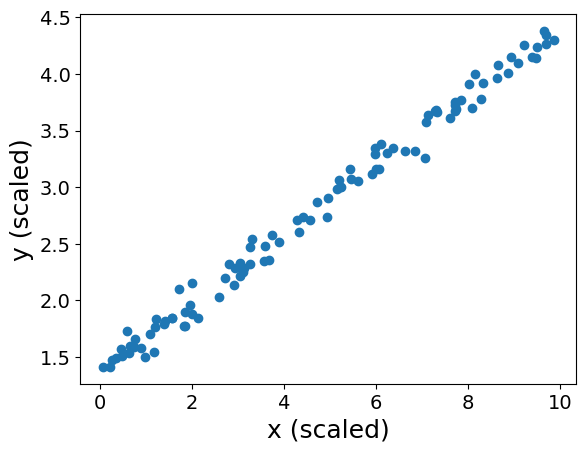

In [542]:
_ = plt.Figure(figsize=(10,8))
plt.scatter(x=X_scaled, y=y_scaled)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x (scaled)", fontsize=18)
plt.ylabel("y (scaled)", fontsize=18)

[0.37454012] [0.95071431]


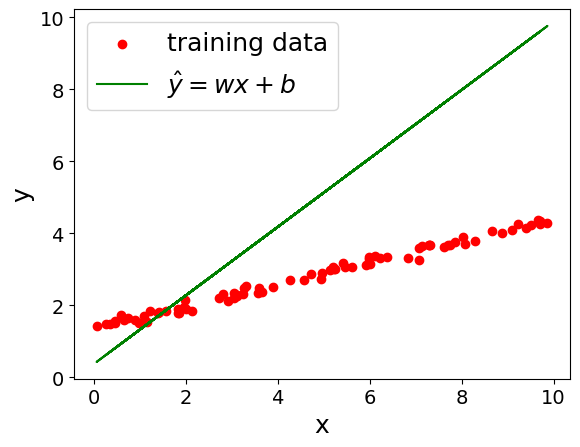

In [543]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
y_train, y_test = y_train.squeeze(), y_test.squeeze()

np.random.seed(42)
b = np.random.rand(1)
w = np.random.rand(1)
print(b, w)

# Model prediction y^hat for the scaled data
yhat = w * X_train + b

# Visualize the model
_ = plt.Figure(figsize=(10,8))
plt.scatter(X_train, y_train, c='red', label='training data')
plt.plot(X_train, yhat, c='green', label=r'$\hat{y} = wx + b$')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(fontsize=18)

12.591202513106088
(80, 100, 100)
Minimum at w = 0.323, b = 1.248, loss = 0.01244


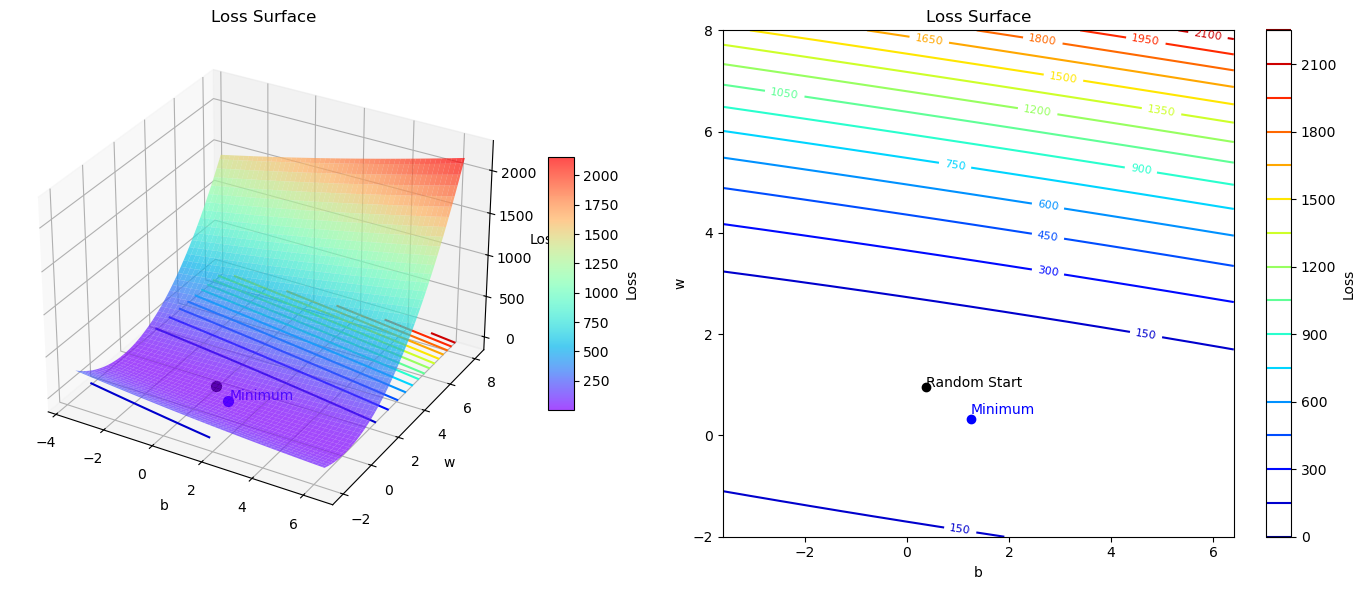

In [544]:
# It is a regression, so the loss can be a mean squared error (MSE)
loss = ((yhat - y_train) ** 2).mean()
# This value corresponds to a particular choice of the model parameters (w and b)
print(loss)

# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 5, true_b + 5, 100)
w_range = np.linspace(true_w - 5, true_w + 5, 100)
# This creates a fine 2D grid in the parameter space
bs, ws = np.meshgrid(b_range, w_range)

# This is a list comprehension that loops through all training features (x), which are scalars (values)
grid_predictions = np.array([bs + ws * x for x in X_train.squeeze()])
print(grid_predictions.shape)

# Now calculate the loss again but for all the predictions
errors = (grid_predictions - y_train[:, np.newaxis, np.newaxis]) ** 2
grid_losses = errors.mean(axis=0)  # average over samples

# Step 1: Get the index of the minimum loss
min_idx = np.unravel_index(np.argmin(grid_losses), grid_losses.shape)

# Step 2: Extract the corresponding w and b
b_min = bs[min_idx]
w_min = ws[min_idx]
print(f"Minimum at w = {w_min:.3f}, b = {b_min:.3f}, loss = {grid_losses[min_idx]:.5f}")

# Setup figure with two subplots: 3D and contour
fig = plt.figure(figsize=(14, 6))

# -------------------------------- #
# 3D LOSS SURFACE WITH COLORBAR #
# -------------------------------- #
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Plot the surface and store the plot object
surf = ax1.plot_surface(bs, ws, grid_losses, cmap='rainbow', alpha=0.7)
cont = ax1.contour(bs, ws, grid_losses, 20, cmap='jet', offset=0)

# Annotations
ax1.scatter(b_min, w_min, 0, color='blue', s=50)  # Example "Minimum"
ax1.text(b_min, w_min+0.1, 1, "Minimum", color='blue')
ax1.scatter(b, w, 2, color='black', s=50)  # Example "Random Start"

ax1.set_xlabel("b")
ax1.set_ylabel("w")
ax1.set_zlabel("Loss")
ax1.set_title("Loss Surface")

# Add colorbar for surface
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, label="Loss")

# ---------------------------------------- #
#          CONTOUR PROJECTION              #
# ---------------------------------------- #
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(bs, ws, grid_losses, levels=20, cmap='jet')
ax2.clabel(contour, inline=True, fontsize=8)

# Add colorbar for contours
contour_cb = fig.colorbar(contour, ax=ax2, label="Loss")

# Points
ax2.scatter(b_min, w_min, color='blue')
ax2.text(b_min, w_min+0.1, "Minimum", color='blue')
ax2.scatter(b, w, color='black')
ax2.text(b, w, "Random Start", color='black')

ax2.set_xlabel("b")
ax2.set_ylabel("w")
ax2.set_title("Loss Surface")

plt.tight_layout()
plt.show()

Unscaled features (e.g., one ranging from 0–10000 and another from 0–1) create skewed loss surfaces. Gradient descent gets confused: it takes tiny steps along the steep dimension and huge, unstable steps along the flat one. This leads to zig-zag paths, slower learning, or even divergence. A useful technique to solve this issue is **Standardization**
## Why Standardization is Important

**Standardization** (or Z-score normalization) is a preprocessing step where we transform each feature to have:

- **Zero mean**: $\mu = 0$
- **Unit standard deviation**: $\sigma = 1$

This is crucial for machine learning algorithms that rely on **gradient descent**, distance metrics, or sensitive weight updates.

---

### Standardization Equation

For a given feature \( x \), with \( N \) samples:

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

$$
\sigma(x) = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2 }
$$

Then we standardize:

$$
\text{scaled } x_i = \frac{x_i - \bar{x}}{\sigma(x)}
$$


- **Faster Convergence**: Gradient descent works better on smooth, symmetric surfaces.
- **Avoid Vanishing Gradients**: Centered inputs reduce gradient decay in deep networks.
- **Equal Feature Influence**: Prevents large-range features from dominating.

In [545]:
# We will standarize our scaled feature (x*10) using built-in scikit-lean method
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(X_train)
# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and TEST sets
sscaled_X_train = scaler.transform(X_train)
sscaled_X_test = scaler.transform(X_test)

(80, 100, 100)
Minimum at w = 0.929, b = 2.764, loss = 0.01114


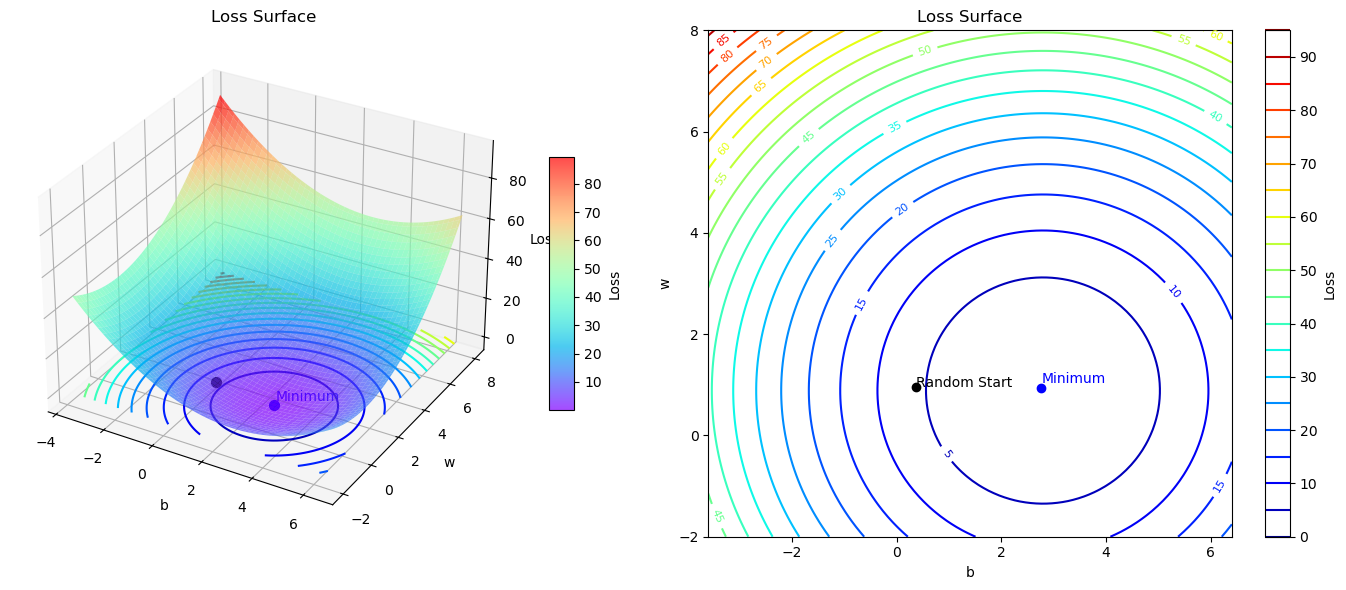

In [546]:
# This is a list comprehension that loops through all training features (x), which are scalars (values)
grid_predictions = np.array([bs + ws * x for x in sscaled_X_train.squeeze()])
print(grid_predictions.shape)

# Now calculate the loss again but for all the predictions
errors = (grid_predictions - y_train[:, np.newaxis, np.newaxis]) ** 2
grid_losses = errors.mean(axis=0)  # average over samples

# Step 1: Get the index of the minimum loss
min_idx = np.unravel_index(np.argmin(grid_losses), grid_losses.shape)

# Step 2: Extract the corresponding w and b
b_min = bs[min_idx]
w_min = ws[min_idx]
print(f"Minimum at w = {w_min:.3f}, b = {b_min:.3f}, loss = {grid_losses[min_idx]:.5f}")

# Setup figure with two subplots: 3D and contour
fig = plt.figure(figsize=(14, 6))

# -------------------------------- #
# 3D LOSS SURFACE WITH COLORBAR #
# -------------------------------- #
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Plot the surface and store the plot object
surf = ax1.plot_surface(bs, ws, grid_losses, cmap='rainbow', alpha=0.7)
cont = ax1.contour(bs, ws, grid_losses, 20, cmap='jet', offset=0)

# Annotations
ax1.scatter(b_min, w_min, 0, color='blue', s=50)  # Example "Minimum"
ax1.text(b_min, w_min+0.1, 1, "Minimum", color='blue')
ax1.scatter(b, w, 2, color='black', s=50)  # Example "Random Start"

ax1.set_xlabel("b")
ax1.set_ylabel("w")
ax1.set_zlabel("Loss")
ax1.set_title("Loss Surface")

# Add colorbar for surface
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10, label="Loss")

# ---------------------------------------- #
#          CONTOUR PROJECTION              #
# ---------------------------------------- #
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(bs, ws, grid_losses, levels=20, cmap='jet')
ax2.clabel(contour, inline=True, fontsize=8)

# Add colorbar for contours
contour_cb = fig.colorbar(contour, ax=ax2, label="Loss")

# Points
ax2.scatter(b_min, w_min, color='blue')
ax2.text(b_min, w_min+0.1, "Minimum", color='blue')
ax2.scatter(b, w, color='black')
ax2.text(b, w, "Random Start", color='black')

ax2.set_xlabel("b")
ax2.set_ylabel("w")
ax2.set_title("Loss Surface")

plt.tight_layout()
plt.show()

### This is the **best loss surface** one could hope for: The cross-sections are going to be **similarly steep**, and a good learning rate for one of them is also good for the other.

### **Batch Gradient Descent**

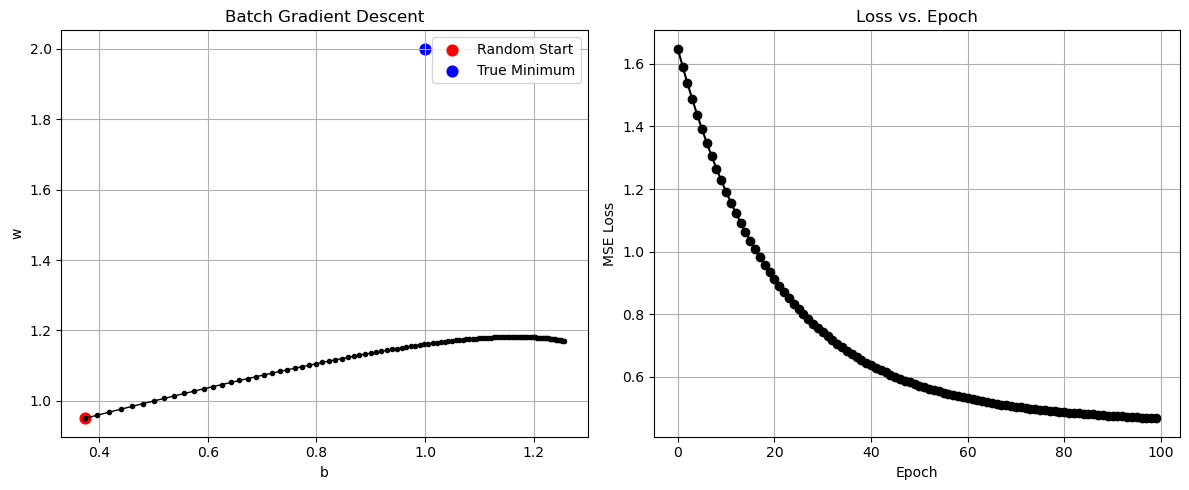

In [621]:
# Set seed for reproducibility
np.random.seed(42)

# Learning rate and number of steps
lr = 0.01
epochs = 100

# Initial random parameters
b = np.random.rand(1)
w = np.random.rand(1)

# Store trajectory and loss
b_vals = [b.copy()]
w_vals = [w.copy()]
loss_vals = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.squeeze(), y_test.squeeze()

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# Batch Gradient Descent Loop
for epoch in range(epochs):
    yhat = b + w * X_train
    error = yhat - y_train
    loss = (error**2).mean()
    
    # Store loss
    loss_vals.append(loss)

    # Compute gradients
    dLdb = 2 * error.mean()
    dLdw = 2 * (X_train * error).mean()

    # Update parameters
    b = b - lr * dLdb
    w = w - lr * dLdw

    # Store updated parameters
    b_vals.append(b.copy())
    w_vals.append(w.copy())

# ---------- Plotting ----------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# (1) Parameter path (b, w)
axs[0].plot(b_vals, w_vals, '-o', color='black', markersize=3, linewidth=1)
axs[0].scatter(b_vals[0], w_vals[0], s=60, color='Red', label='Random Start')
axs[0].scatter(true_b, true_w, s=60, color='blue', label='True Minimum')
axs[0].set_xlabel("b")
axs[0].set_ylabel("w")
axs[0].set_title("Batch Gradient Descent")
axs[0].grid(True)
axs[0].legend()

# (2) Loss vs. Epoch
axs[1].plot(loss_vals, '-o', color='black')
axs[1].set_title("Loss vs. Epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("MSE Loss")
axs[1].grid(True)

plt.tight_layout()
plt.show()


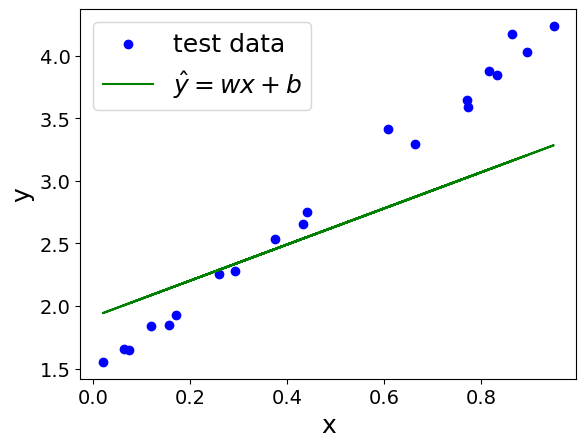

In [613]:
# Model prediction y^hat for the scaled data
yhat = w_vals[-1] * X_test + b_vals[-1]

# Visualize the model
_ = plt.Figure(figsize=(10,8))
plt.scatter(X_test, y_test, c='blue', label='test data')
plt.plot(X_test, yhat, c='green', label=r'$\hat{y} = wx + b$')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.legend(fontsize=18)

### **Stochastic Gradient Descent**

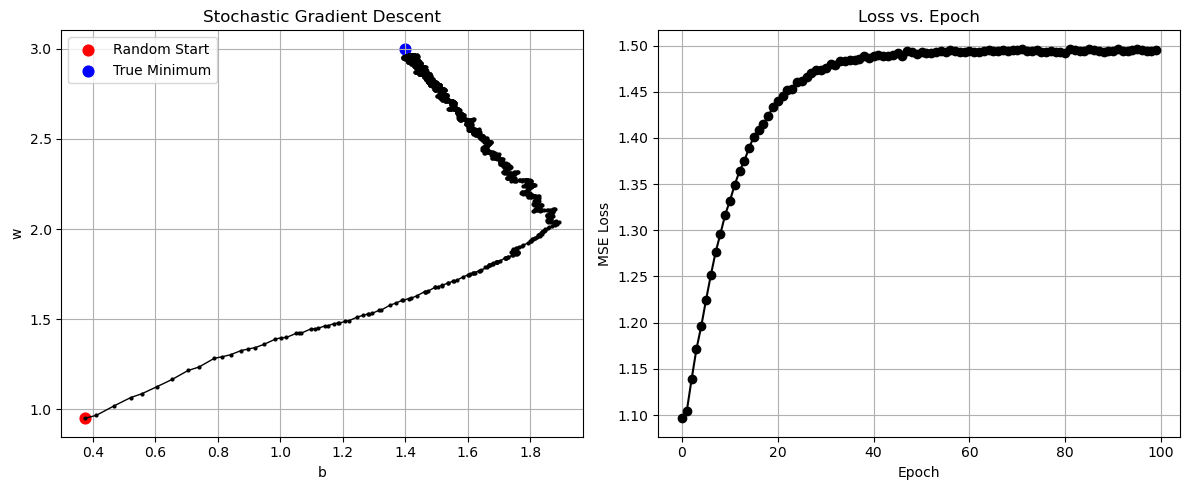

In [614]:
# Set seed for reproducibility
np.random.seed(42)

# Learning rate and number of epochs
lr = 0.01
epochs = 100

# Generate and split data (assuming X, y already exist)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.squeeze(), y_test.squeeze()

# Standardize
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize parameters
b = np.random.rand(1)
w = np.random.rand(1)

# Store trajectory and loss
b_vals = [b.copy()]
w_vals = [w.copy()]
loss_vals = []

# ----------- SGD Loop -----------
for epoch in range(epochs):
    # Shuffle data each epoch
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    
    for i in range(len(X_train)):
        xi = X_train_shuffled[i]
        yi = y_train_shuffled[i]

        yhat = w * xi + b
        error = yhat - yi

        # Compute gradients for one point
        dLdb = 2 * error
        dLdw = 2 * xi * error

        # Update parameters
        b = b - lr * dLdb
        w = w - lr * dLdw

        b_vals.append(b.copy())
        w_vals.append(w.copy())

    # Compute and store full-batch loss for visualization
    epoch_yhat = w * X_train + b
    epoch_error = epoch_yhat - y_train
    epoch_loss = (epoch_error**2).mean()
    loss_vals.append(epoch_loss)

# ---------- Plotting ----------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# (1) Parameter path (b, w)
axs[0].plot(b_vals, w_vals, '-o', color='black', markersize=2, linewidth=1)
axs[0].scatter(b_vals[0], w_vals[0], s=60, color='red', label='Random Start')
axs[0].scatter(true_b, true_w, s=60, color='blue', label='True Minimum')
axs[0].set_xlabel("b")
axs[0].set_ylabel("w")
axs[0].set_title("Stochastic Gradient Descent")
axs[0].grid(True)
axs[0].legend()

# (2) Loss vs. Epoch
axs[1].plot(loss_vals, '-o', color='black')
axs[1].set_title("Loss vs. Epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("MSE Loss")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### **Mini-Batch Gradient Descent**

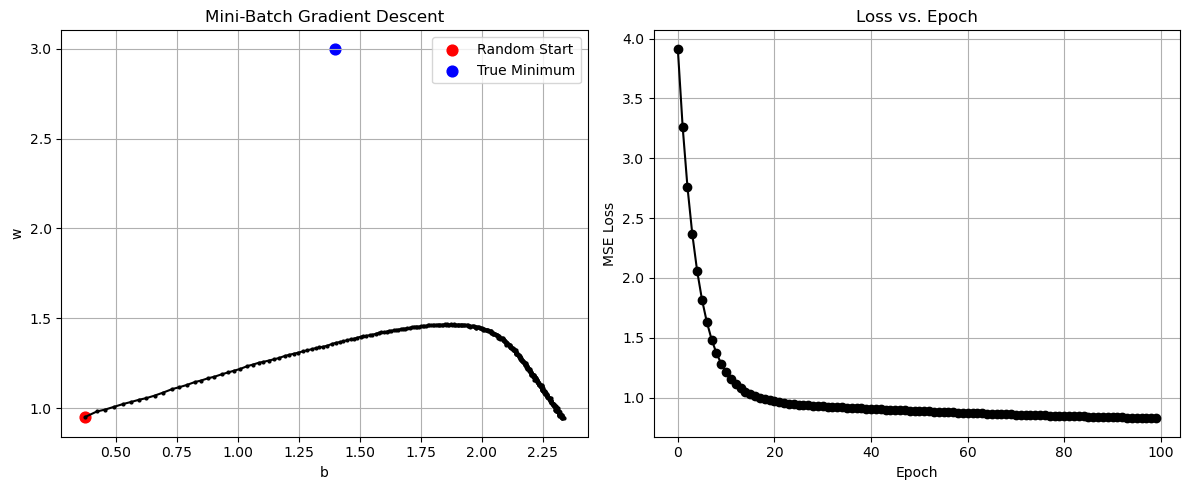

In [609]:
# Set seed for reproducibility
np.random.seed(42)

# Learning rate, epochs, and batch size
lr = 0.01
epochs = 100
batch_size = 16

# Prepare data (X, y assumed already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.squeeze(), y_test.squeeze()

# Standardize features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize weights
b = np.random.rand(1)
w = np.random.rand(1)

# Trajectories
b_vals = [b.copy()]
w_vals = [w.copy()]
loss_vals = []

# -------- Mini-Batch Gradient Descent Loop --------
for epoch in range(epochs):
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    
    for i in range(0, len(X_train), batch_size):
        x_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        yhat = w * x_batch + b
        error = yhat - y_batch

        # Gradients for the mini-batch
        dLdb = (2 * error).mean()
        dLdw = (2 * x_batch * error).mean()

        # Parameter update
        b = b - lr * dLdb
        w = w - lr * dLdw

        b_vals.append(b.copy())
        w_vals.append(w.copy())

    # Epoch loss (on full batch)
    epoch_yhat = w * X_train + b
    epoch_error = epoch_yhat - y_train
    epoch_loss = (epoch_error**2).mean()
    loss_vals.append(epoch_loss)

# -------- Plotting --------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# (1) Parameter trajectory
axs[0].plot(b_vals, w_vals, '-o', color='black', markersize=2)
axs[0].scatter(b_vals[0], w_vals[0], s=60, color='red', label='Random Start')
axs[0].scatter(true_b, true_w, s=60, color='blue', label='True Minimum')
axs[0].set_title("Mini-Batch Gradient Descent")
axs[0].set_xlabel("b")
axs[0].set_ylabel("w")
axs[0].legend()
axs[0].grid(True)

# (2) Loss vs Epoch
axs[1].plot(loss_vals, '-o', color='black')
axs[1].set_title("Loss vs. Epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("MSE Loss")
axs[1].grid(True)

plt.tight_layout()
plt.show()
